In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind as tt

In [2]:
# load data
df = pd.read_csv("../data/trials_decisions.csv", sep=",", index_col=False)
df.index.name = "Run"

participants = ["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08","P09", "P10"]


In [3]:
# correct answers of subjects
# per subject: 10 runs: one desired answer per run
true_answers = [
                [1, 2, 1, 2, 1, 2, 1, 1, 1, 1],
                [1, 1, 2, 1, 2, 1, 2, 1, 1, 1],
                [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
                [2, 1, 1, 1, 2, 2, 1, 1, 1, 1],
                [1, 2, 1, 2, 2, 1, 2, 1, 2, 1],
                [2, 1, 2, 2, 1, 1, 1, 1, 2, 1],
                [2, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 1, 2, 1, 2, 1, 1, 1, 2],
                [1, 2, 1, 2, 2, 2, 1, 2, 1, 1],
                [2, 1, 1, 1, 1, 2, 2, 1, 2, 1],
                ]

In [4]:
# set up result dfs for 
    # 1. half vs. 2. half
    # yes vs. no trials
    
res = pd.DataFrame(columns=["participants","accuracy","half1","half2","yes","no","total N of trials"])

In [5]:
# loop over participants
for p in participants:
    # select columns containing trial decision of participant p
    cols = [c for c in df.columns if p in c]    
            
    # initialize counter per participant
    half1_correct = 0
    half2_correct = 0
    yes_correct = 0
    no_correct = 0
    total_counter = 0
    
    # loop over runs (not always equal to 10, see P07)
    for r in range(len(true_answers[participants.index(p)])):
        dfp = df[cols].values[r]       
        
        # loop over trials per run
        for t in range(10):
            # test if the current trial of the current run of the current participant is correct           
            # decision should match correct answer in first half of run
            if t <= 4:   
                if dfp[t] == true_answers[participants.index(p)][r]:
                    half1_correct += 1
                    # if trial is a correct yes
                    if true_answers[participants.index(p)][r] == 1:
                         yes_correct += 1
                    # if trial is a correct no
                    else:
                        no_correct += 1
            # decision should match opposite answer in second half of run   
            if t > 4: 
                if dfp[t] == true_answers[participants.index(p)][r]:
                    half2_correct += 1
                    if true_answers[participants.index(p)][r] == 1:
                         no_correct += 1
                    else:
                        yes_correct += 1   
            
            # count total number of trials per participant
            total_counter += 1
        
    print(f"Participant {p}")
    print(f"Acc:\t{(half1_correct+half2_correct)}/{total_counter}")
    print(f"Half 1:\t{half1_correct}/{total_counter/2}")
    print(f"Half 2:\t{half2_correct}/{total_counter/2}")
    print(f"Yes:\t{yes_correct}/{total_counter/2}")
    print(f"No:\t{no_correct}/{total_counter/2}\n")
    
    row = dict(zip(res.columns,[p, 
                                (half1_correct+half2_correct)/total_counter,
                                half1_correct/(total_counter/2), 
                                half2_correct/(total_counter/2),
                                yes_correct/(total_counter/2),
                                no_correct/(total_counter/2),
                                total_counter]))
    res = res.append(row, ignore_index=True)
    

Participant P01
Acc:	49/100
Half 1:	24/50.0
Half 2:	25/50.0
Yes:	24/50.0
No:	25/50.0

Participant P02
Acc:	60/100
Half 1:	28/50.0
Half 2:	32/50.0
Yes:	32/50.0
No:	28/50.0

Participant P03
Acc:	91/100
Half 1:	46/50.0
Half 2:	45/50.0
Yes:	45/50.0
No:	46/50.0

Participant P04
Acc:	82/100
Half 1:	41/50.0
Half 2:	41/50.0
Yes:	42/50.0
No:	40/50.0

Participant P05
Acc:	79/100
Half 1:	37/50.0
Half 2:	42/50.0
Yes:	38/50.0
No:	41/50.0

Participant P06
Acc:	69/100
Half 1:	33/50.0
Half 2:	36/50.0
Yes:	34/50.0
No:	35/50.0

Participant P07
Acc:	53/90
Half 1:	27/45.0
Half 2:	26/45.0
Yes:	26/45.0
No:	27/45.0

Participant P08
Acc:	49/100
Half 1:	24/50.0
Half 2:	25/50.0
Yes:	26/50.0
No:	23/50.0

Participant P09
Acc:	74/100
Half 1:	39/50.0
Half 2:	35/50.0
Yes:	36/50.0
No:	38/50.0

Participant P10
Acc:	69/100
Half 1:	33/50.0
Half 2:	36/50.0
Yes:	36/50.0
No:	33/50.0



C:\Users\Anna\AppData\Local\Temp\ipykernel_118332\1776440232.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(row, ignore_index=True)
C:\Users\Anna\AppData\Local\Temp\ipykernel_118332\1776440232.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(row, ignore_index=True)
C:\Users\Anna\AppData\Local\Temp\ipykernel_118332\1776440232.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(row, ignore_index=True)
C:\Users\Anna\AppData\Local\Temp\ipykernel_118332\1776440232.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(row, ignore_index=True)
C:\Users\Anna\AppData\Lo

In [6]:
res

,participants,accuracy,half1,half2,yes,no,total N of trials
0,P01,0.49,0.48,0.5,0.48,0.5,100
1,P02,0.6,0.56,0.64,0.64,0.56,100
2,P03,0.91,0.92,0.9,0.9,0.92,100
3,P04,0.82,0.82,0.82,0.84,0.8,100
4,P05,0.79,0.74,0.84,0.76,0.82,100
5,P06,0.69,0.66,0.72,0.68,0.7,100
6,P07,0.588889,0.6,0.577778,0.577778,0.6,90
7,P08,0.49,0.48,0.5,0.52,0.46,100
8,P09,0.74,0.78,0.7,0.72,0.76,100
9,P10,0.69,0.66,0.72,0.72,0.66,100


In [7]:
res.std()

C:\Users\Anna\AppData\Local\Temp\ipykernel_118332\1064184029.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res.std()


accuracy             0.139560
half1                0.145831
half2                0.138509
yes                  0.133794
no                   0.149205
total N of trials    3.162278
dtype: float64

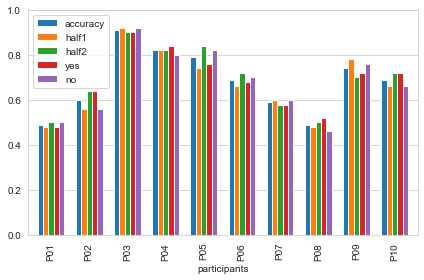

In [8]:
sns.set_style("whitegrid")
#res = res.sort_values(by="accuracy", ascending=False)
res.plot(x="participants", y=list(res.columns[1:-1]), kind="bar",
        layout=(2,2), subplots=False, legend=True, sharey=True, width=.7,
        figsize=(6,4), yticks=[0,.2,.4,.6,.8,1],
        )
plt.grid(axis="x")
plt.ylim(0,1)
plt.tight_layout()

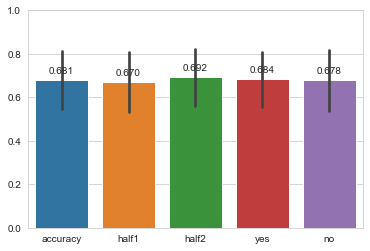

In [9]:
plt.ylim(0,1)
splot = sns.barplot(data=res.iloc[:,:-1], ci="sd")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [10]:
tt(res["half1"], res["half2"])

Ttest_indResult(statistic=-0.34241044872941007, pvalue=0.7360078502009939)

In [11]:
tt(res["yes"], res["no"])

Ttest_indResult(statistic=0.09116916177104593, pvalue=0.9283651009971122)

In [26]:
from scipy.stats import chisquare
# for sig. chi squared tests
counter = 0
# for effect size phi/Cramer's V with df=1
vals = [.1,.3,.5] 
labls = ["small", "medium", "large"]

chis = list()
effectsizes = list()

for p in range(len(res)):
    observed = [res["yes"][p]*50, 50- res["yes"][p]*50, res["no"][p]*50, 50-res["no"][p]*50] # observed frequencies of TP, FP, TN, FN
    chi = chisquare(observed, [25]*4) # [25]*4 are the expected frequencies of TP, FP, TN, FN
    print(f"P{p+1}") # subject
    print(chi)
    chis.append(chi)
    if chi[1] <= .05: # if significant at alpha = .05
        counter +=1
        es = np.sqrt(chi[0] / 100) # effect size
        idx = max([[.1,.3,.5].index(c) for c in [.1,.3,.5] if es >= c ]) # >=.1 = small, >=.3 = medium, >=.5 = large effect size
        print(f"\t\tEffect size: phi = {es}, {labls[idx]}")
        effectsizes.append(es)
    else:
        effectsizes.append(None)
print(f"\nNumber of subjects sig. better than chance level (with p <= .05): \n{counter}")


res = res.assign(chi_square_val=np.array(chis)[:,0])
res = res.assign(chi_square_p=np.array(chis)[:,1].round(2))
res = res.assign(chi_square_effect_size=effectsizes)
#res.prin(effect_size=effectsizes)

P1
Power_divergenceResult(statistic=0.08, pvalue=0.9941243682104942)
P2
Power_divergenceResult(statistic=4.640000000000002, pvalue=0.2001374153373312)
P3
Power_divergenceResult(statistic=67.28, pvalue=1.6312990947060236e-14)
		Effect size: phi = 0.8202438661763952, large
P4
Power_divergenceResult(statistic=41.120000000000005, pvalue=6.166984986254534e-09)
		Effect size: phi = 0.6412487816752559, large
P5
Power_divergenceResult(statistic=34.0, pvalue=1.9811876641985663e-07)
		Effect size: phi = 0.5830951894845301, large
P6
Power_divergenceResult(statistic=14.48, pvalue=0.0023195272962100596)
		Effect size: phi = 0.380525951808809, medium
P7
Power_divergenceResult(statistic=3.209876543209875, pvalue=0.3603843958397054)
P8
Power_divergenceResult(statistic=0.4, pvalue=0.9402424948393607)
P9
Power_divergenceResult(statistic=23.199999999999996, pvalue=3.668635719472368e-05)
		Effect size: phi = 0.4816637831516918, medium
P10
Power_divergenceResult(statistic=14.8, pvalue=0.001995790028753644)

In [27]:
res

,participants,accuracy,half1,half2,yes,no,total N of trials,chi_square_val,chi_square_p,chi_square_effect_size
0,P01,0.49,0.48,0.5,0.48,0.5,100,0.080000,0.99,NaN
1,P02,0.6,0.56,0.64,0.64,0.56,100,4.640000,0.20,NaN
2,P03,0.91,0.92,0.9,0.9,0.92,100,67.280000,0.00,0.820244
3,P04,0.82,0.82,0.82,0.84,0.8,100,41.120000,0.00,0.641249
4,P05,0.79,0.74,0.84,0.76,0.82,100,34.000000,0.00,0.583095
5,P06,0.69,0.66,0.72,0.68,0.7,100,14.480000,0.00,0.380526
6,P07,0.588889,0.6,0.577778,0.577778,0.6,90,3.209877,0.36,NaN
7,P08,0.49,0.48,0.5,0.52,0.46,100,0.400000,0.94,NaN
8,P09,0.74,0.78,0.7,0.72,0.76,100,23.200000,0.00,0.481664
9,P10,0.69,0.66,0.72,0.72,0.66,100,14.800000,0.00,0.384708


In [29]:
res.to_csv("chi_square.csv")
res.to_excel("chi_square.xlsx")